<a href="https://colab.research.google.com/github/gguex/ISH_ressources_cours_ML/blob/main/TP04c_corrige.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# Pour modifier la taille de sortie de graphiques dans le notebook
plt.rcParams['figure.figsize'] = [15, 15]
# Pour le traitement des données
from sklearn.preprocessing import StandardScaler
# le kNN et les SVM
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
# Pour la CV
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
file_path = "drive/MyDrive/Colab Notebooks/ml_data/TP4/Social_Network_Ads.csv"
data = pd.read_csv(file_path)
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
# On transforme la variable age en numérique
data["Gender"].replace(["Male", "Female"], [0, 1], inplace=True)
# On standardise et sauve les entrées
inputs = StandardScaler().fit_transform(data.drop(["User ID", "Purchased"], axis=1))
# On prend la sortie
outputs = data["Purchased"]
# On sépare le jeu de données
inputs_train_val, inputs_test, outputs_train_val, outputs_test \
  = train_test_split(inputs, outputs, test_size=0.25, stratify=outputs)

In [4]:
# Paramètres pour le nombre de voisins
k_par = list(range(1, 31))
param_dict = {"n_neighbors": k_par}
n_cv = 4
# Recherche sur grille avec CV
knn_classifier = KNeighborsClassifier()
gride_search_knn = GridSearchCV(knn_classifier,
                                param_dict,
                                cv=n_cv)
gride_search_knn.fit(inputs_train_val, outputs_train_val)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]})

In [5]:
accuracy_knn_test = gride_search_knn.best_estimator_.score(inputs_test, outputs_test)
best_k = gride_search_knn.best_params_["n_neighbors"]
print(f"kNN: meilleure paramètre k = {best_k}")
print(f"kNN: meilleure exactitude d'entrainement = "
      f"{gride_search_knn.best_score_: .2%}")
print(f"kNN: meilleure exactitude de test = {accuracy_knn_test: .2%}")

kNN: meilleure paramètre k = 10
kNN: meilleure exactitude d'entrainement =  89.67%
kNN: meilleure exactitude de test =  95.00%


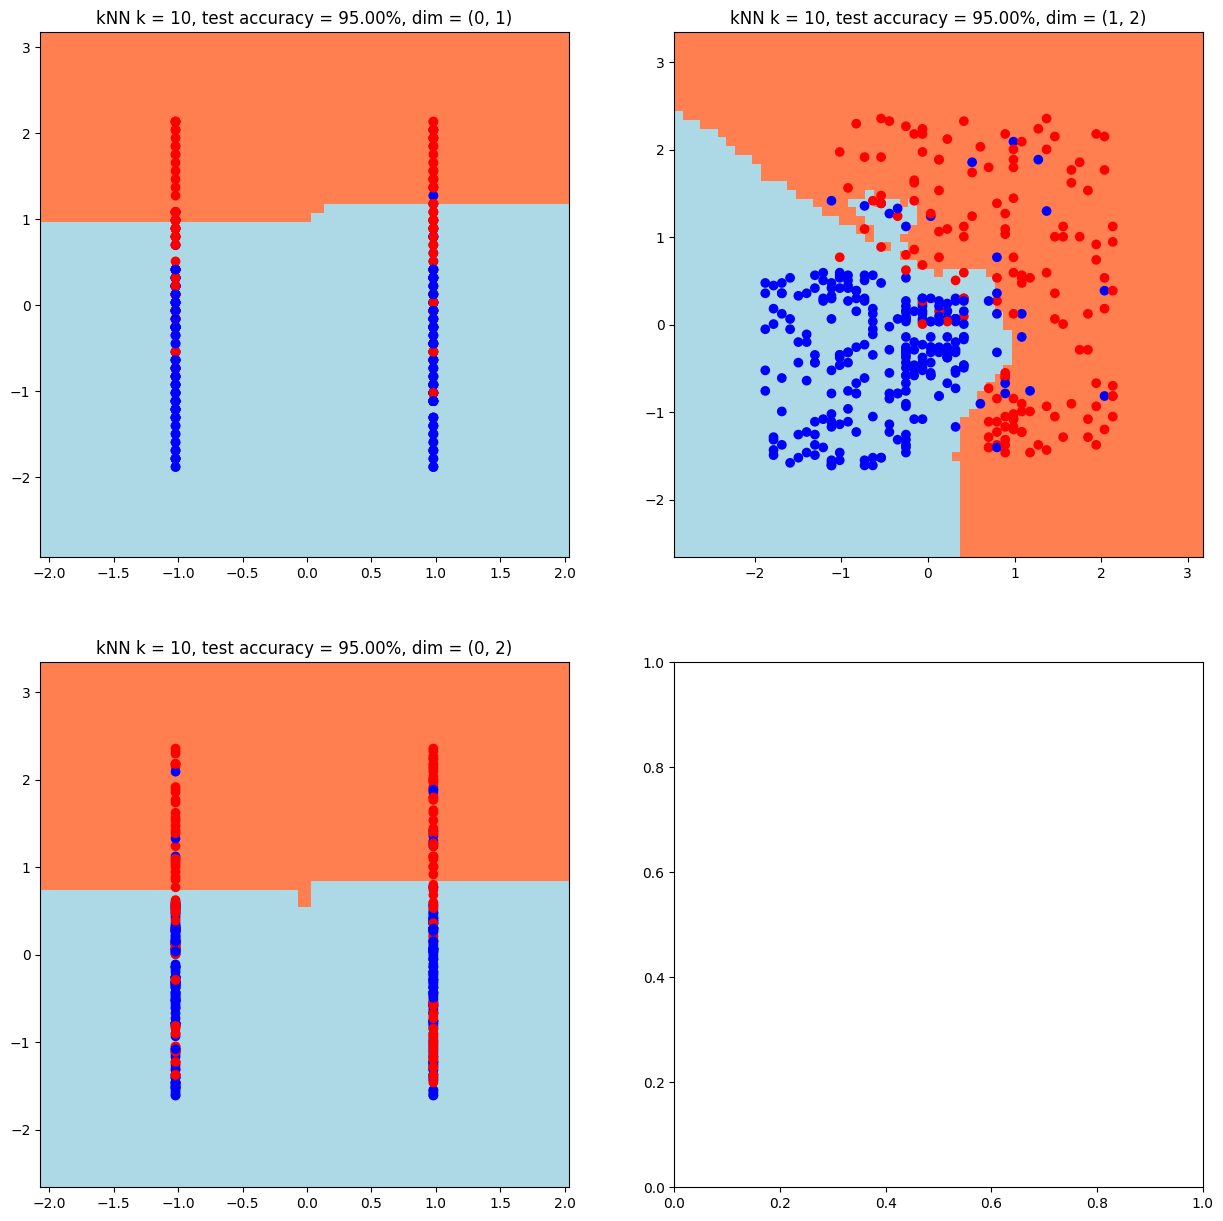

In [6]:
# Les dimensions que nous allons examiner
dim_list = [(0, 1), (1, 2), (0, 2)]
# La position des graphs dans le carré
pos_list = [(0, 0), (0, 1), (1, 0)]
# Nos couleurs
mesh_cmap = ListedColormap(["lightblue", "coral"])
points_cmap = ListedColormap(["blue", "red"])
# La taille de la mesh
mesh_size = 0.1

# On créée le graphique
fig, axs = plt.subplots(2, 2)

# On fait une boucle sur les dimensions
for i, dim in enumerate(dim_list):
  # On restreint les données
  X = inputs[:, dim]
  # On fixe les limites
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  # On définit notre mesh
  xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_size),
                        np.arange(y_min, y_max, mesh_size))
  # On définit les inputs
  new_values = np.c_[xx.ravel(), yy.ravel()]
  grid_input = np.zeros((new_values.shape[0], inputs.shape[1]))
  grid_input[:, dim] = new_values
  # On fait les prédictions, que l'on transforme en valeurs numériques
  grid_pred = gride_search_knn.best_estimator_.predict(grid_input)
  grid_pred = grid_pred.reshape(xx.shape)

  # On fait le graphique
  axs[pos_list[i]].pcolormesh(xx, yy, grid_pred, cmap=mesh_cmap)
  axs[pos_list[i]].scatter(X[:, 0], X[:, 1], c=outputs, cmap=points_cmap)
  axs[pos_list[i]].set_title(f"kNN k = {best_k}, test accuracy = {accuracy_knn_test:.2%}, dim = {dim}")

In [7]:
c_par = np.linspace(1, 10, 20)
gamma_par = np.linspace(0.01, 2, 20)
param_dict = {"C": c_par, "gamma": gamma_par}
n_cv = 4
svm_classifier = SVC()
# Recherche sur grille avec CV
gride_search_svm = GridSearchCV(svm_classifier,
                                param_dict,
                                cv=n_cv,
                                verbose=4)
gride_search_svm.fit(inputs_train_val, outputs_train_val)

Fitting 4 folds for each of 400 candidates, totalling 1600 fits
[CV 1/4] END .................C=1.0, gamma=0.01;, score=0.773 total time=   0.0s
[CV 2/4] END .................C=1.0, gamma=0.01;, score=0.840 total time=   0.0s
[CV 3/4] END .................C=1.0, gamma=0.01;, score=0.760 total time=   0.0s
[CV 4/4] END .................C=1.0, gamma=0.01;, score=0.827 total time=   0.0s
[CV 1/4] END ..C=1.0, gamma=0.11473684210526315;, score=0.907 total time=   0.0s
[CV 2/4] END ..C=1.0, gamma=0.11473684210526315;, score=0.893 total time=   0.0s
[CV 3/4] END ..C=1.0, gamma=0.11473684210526315;, score=0.813 total time=   0.0s
[CV 4/4] END ..C=1.0, gamma=0.11473684210526315;, score=0.933 total time=   0.0s
[CV 1/4] END ..C=1.0, gamma=0.21947368421052632;, score=0.920 total time=   0.0s
[CV 2/4] END ..C=1.0, gamma=0.21947368421052632;, score=0.893 total time=   0.0s
[CV 3/4] END ..C=1.0, gamma=0.21947368421052632;, score=0.827 total time=   0.0s
[CV 4/4] END ..C=1.0, gamma=0.219473684210526

GridSearchCV(cv=4, estimator=SVC(),
             param_grid={'C': array([ 1.        ,  1.47368421,  1.94736842,  2.42105263,  2.89473684,
        3.36842105,  3.84210526,  4.31578947,  4.78947368,  5.26315789,
        5.73684211,  6.21052632,  6.68421053,  7.15789474,  7.63157895,
        8.10526316,  8.57894737,  9.05263158,  9.52631579, 10.        ]),
                         'gamma': array([0.01      , 0.11473684, 0.21947368, 0.32421053, 0.42894737,
       0.53368421, 0.63842105, 0.74315789, 0.84789474, 0.95263158,
       1.05736842, 1.16210526, 1.26684211, 1.37157895, 1.47631579,
       1.58105263, 1.68578947, 1.79052632, 1.89526316, 2.        ])},
             verbose=4)

In [8]:
accuracy_svm_test = gride_search_svm.best_estimator_.score(inputs_test, outputs_test)
print(f"SVM: meilleures paramètres {gride_search_svm.best_params_}")
print(f"SVM: meilleure exactitude d'entrainement = "
      f"{gride_search_svm.best_score_: .2%}")
print(f"SVM: meilleure exactitude de test = {accuracy_svm_test: .2%}")

SVM: meilleures paramètres {'C': 7.157894736842105, 'gamma': 0.11473684210526315}
SVM: meilleure exactitude d'entrainement =  89.67%
SVM: meilleure exactitude de test =  94.00%


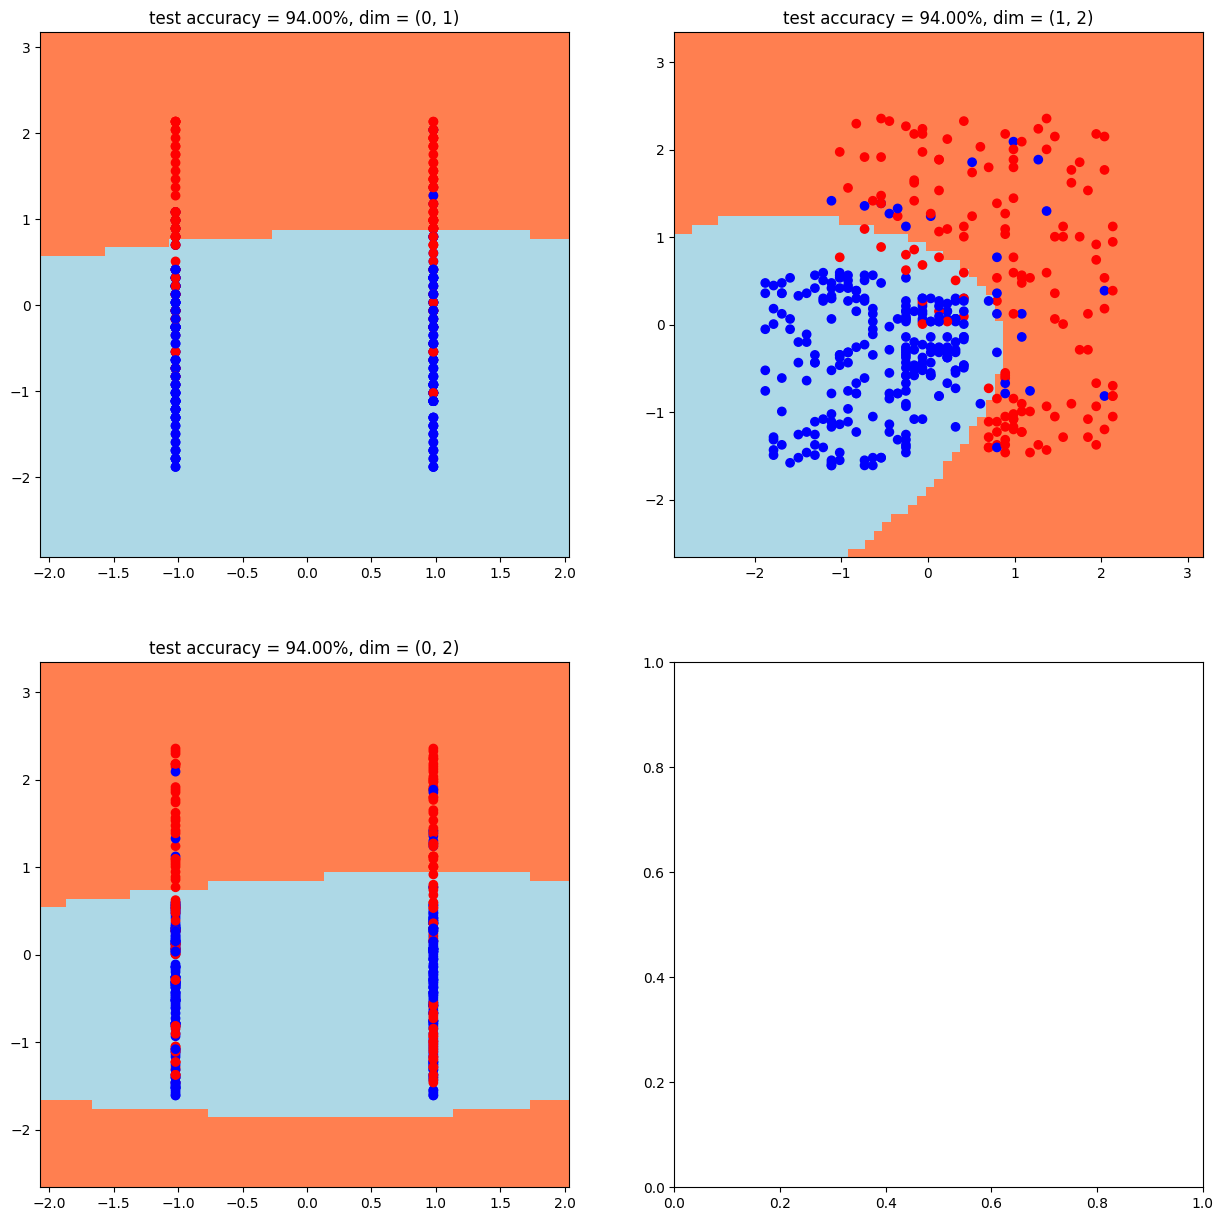

In [9]:
# On créée le graphique
fig, axs = plt.subplots(2, 2)

# On fait une boucle sur les dimensions
for i, dim in enumerate(dim_list):
  # On restreint les données
  X = inputs[:, dim]
  # On fixe les limites
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  # On définit notre mesh
  xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_size),
                        np.arange(y_min, y_max, mesh_size))
  # On définit les inputs
  new_values = np.c_[xx.ravel(), yy.ravel()]
  grid_input = np.zeros((new_values.shape[0], inputs.shape[1]))
  grid_input[:, dim] = new_values
  # On fait les prédictions, que l'on transforme en valeurs numériques
  grid_pred = gride_search_svm.best_estimator_.predict(grid_input)
  grid_pred = grid_pred.reshape(xx.shape)

  # On fait le graphique
  axs[pos_list[i]].pcolormesh(xx, yy, grid_pred, cmap=mesh_cmap)
  axs[pos_list[i]].scatter(X[:, 0], X[:, 1], c=outputs, cmap=points_cmap)
  axs[pos_list[i]].set_title(f"test accuracy = {accuracy_svm_test:.2%}, "
                             f"dim = {dim}")